In [49]:
import pandas as pd # Se usa para la lectura y escritura de datos, manipulación de marcos de datos, limpieza y preprocesamiento de datos.
import numpy as np # Se usa para manipulación de matrices, álgebra lineal, generación de números aleatorios.
import matplotlib.pyplot as plt # Se usa para creación de gráficos de líneas, histogramas, dispersión.
import seaborn as sns # Se usa para crear visualizaciones estadísticas más atractivas y detalladas.
from wordcloud import WordCloud # Se usa para la visualización de palabras clave en función de su frecuencia en un conjunto de texto.
import nltk # Se usa para entender y procesar el lenguaje escrito de una manera más fácil y efectiva
import warnings # Se usa para el control de advertencias para mejorar la legibilidad y depuración del código.
from sklearn.metrics.pairwise import cosine_similarity # Es un sistemas de recomendación, procesamiento de texto, y otros contextos donde se necesita medir la similitud entre elementos.
from sklearn.metrics.pairwise import linear_kernel # Es utilizada en contextos de aprendizaje automático y minería de datos.
from sklearn.feature_extraction.text import TfidfVectorizer # Preprocesamiento de texto para tareas de aprendizaje automático, como la clasificación de texto o la agrupación de documentos.
from collections import Counter

1. Carga de archivos limpios 

In [50]:
# Se realiza la lectura del archivo y se visualiza su contenido
Df_General = pd.read_csv('Df_General.csv')
Df_General.tail()

,app_name,price,id,release_year,Accounting,Action,Adventure,Animation &amp; Modeling,Audio Production,Casual,...,steam_id,playtime_forever,playtime_2weeks,]playtime_2weeks,posted,item_id,recommend,review,year,sentiment
38149,Day of Defeat,4.99,30,2003,0,1,0,0,0,0,...,76561198085345522,4,0,0,2014-07-16,1250,True,awesome game,2014,2
38150,Day of Defeat,4.99,30,2003,0,1,0,0,0,0,...,76561198085345522,4,0,0,2013-11-27,218230,True,FUN but wont launch now,2013,2
38151,Day of Defeat,4.99,30,2003,0,1,0,0,0,0,...,76561198089218473,15,0,0,2014-05-09,293010,True,"A great game, except it feels alot like Mount ...",2014,2
38152,Unreal Tournament 2004: Editor's Choice Edition,14.99,13230,2004,0,1,0,0,0,0,...,76561198045631910,133,0,0,2014-06-14,252490,True,This game is full of psychopath human hating p...,2014,0
38153,Unreal Tournament 2004: Editor's Choice Edition,14.99,13230,2004,0,1,0,0,0,0,...,76561198152281826,2952,51,51,2014-12-21,39140,True,I havent played this game in over 8 years unti...,2014,2


In [51]:
Df_General.info()
Df_General['id'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38154 entries, 0 to 38153
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   app_name                   38154 non-null  object 
 1   price                      37955 non-null  float64
 2   id                         38154 non-null  int64  
 3   release_year               38154 non-null  int64  
 4   Accounting                 38154 non-null  int64  
 5   Action                     38154 non-null  int64  
 6   Adventure                  38154 non-null  int64  
 7   Animation &amp; Modeling   38154 non-null  int64  
 8   Audio Production           38154 non-null  int64  
 9   Casual                     38154 non-null  int64  
 10  Design &amp; Illustration  38154 non-null  int64  
 11  Early Access               38154 non-null  int64  
 12  Education                  38154 non-null  int64  
 13  Free to Play               38154 non-null  int

array([    70,   2400,   3800,   1520,   4000, 211820,   4230,   6200,
         6210,   6300,   2990,   6220,   6510,   1700,   6310,   7600,
         2540,   7650,   8000,   6550,   2280,   2300,   2270,   9010,
         3810,   2310,   7670,   4570,   4580,   4760,  12160,   7000,
        12140,  17480,  12510,   2780,   2700,  13200,  13520,  13240,
        15960,  15200,  15700,   7760,  20510,  17300,  20900,   1530,
        21000,  22000,   2820,  12200,  19900,  11240,   9480,  17470,
        12770,  17410,  18500,  16450,  11340,  13210,  24740,  11330,
         1930,   7510,  22200,  22330,  21660,   6060,  36000,  32370,
        37400,  11390,  35000,  40700,  41500,  24800,  17450,  10180,
        32440,  11450,  24790,  22370,  46410,  48700,  45400,  49600,
        40930,  33650,  34270,  24780,  50130,  22600,  42960,  57300,
        70400,   8930,  50620,  57800,  22380,   6120,  32500,  42700,
        15740,  12100,  12120,  47780,  63200,  47890,   9930,  91200,
      

In [52]:
# Se elimina la columna ]playtime_2weeks debido a su duplicación en el conjunto de datos.
columna_a_eliminar = ']playtime_2weeks'
Df_General = Df_General.drop(columna_a_eliminar, axis=1)

In [53]:
# Se suprimen todos los warnings
warnings.filterwarnings("ignore")

In [54]:
# Se crea una lista con las variables numéricas
columnas_a_eliminar = [	'id','steam_id', 'Early Access','item_id','Accounting','Action','Adventure','Animation &amp; Modeling','Audio Production','Casual','Design &amp; Illustration','Education','Free to Play','Indie','Massively Multiplayer','Photo Editing','RPG','Racing','Simulation','Software Training','Sports','Strategy','Utilities','Video Production','Web Publishing']
Df_numerico = Df_General.select_dtypes(include = (int,float))
Df_numerico.drop(columns=columnas_a_eliminar, inplace=True)
# Se realiza un análisis estadístico de los datos, excluyendo las columnas de identificación (id)
Df_numerico.describe()

,price,release_year,playtime_forever,playtime_2weeks,year,sentiment
count,37955.000000,38154.000000,38154.000000,38154.000000,38154.000000,38154.000000
mean,12.104178,2004.917885,4998.342087,22.775122,2014.158253,1.359019
std,5.066286,2.894405,13852.147255,207.112663,0.834643,0.807829
min,0.990000,1990.000000,1.000000,0.000000,2010.000000,0.000000
25%,9.990000,2004.000000,151.000000,0.000000,2014.000000,1.000000
50%,9.990000,2006.000000,727.000000,0.000000,2014.000000,2.000000
75%,9.990000,2006.000000,3241.750000,0.000000,2015.000000,2.000000
max,160.910000,2017.000000,336763.000000,9089.000000,2015.000000,2.000000


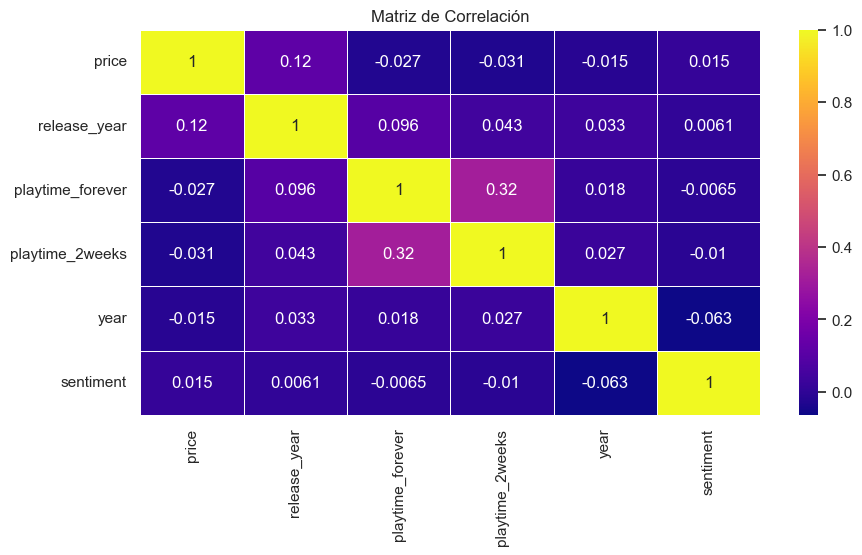

In [55]:
# Se calcula la matriz de correlación entre las variables numéricas
matriz_correlacion = Df_numerico.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(matriz_correlacion, annot=True, cmap='plasma', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

Conclusion matriz de correlación
No se observan relaciones fuertes, ya que la mayoría de las celdas están coloreadas de morado. No obstante, 
se pueden apreciar algunas correlaciones positivas moderadas representadas por tonalidades más claras.

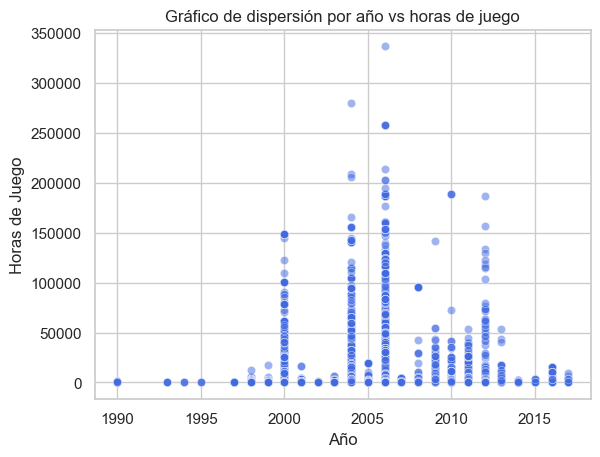

In [56]:
# Se crea un scatter plot de release_year vs playtime_forever
sns.set(style="whitegrid")
sns.scatterplot(x='release_year', y='playtime_forever', data=Df_numerico, color='royalblue', alpha=0.5)
# Se personaliza el grafico
plt.title('Gráfico de dispersión por año vs horas de juego')
plt.xlabel('Año')
plt.ylabel('Horas de Juego')
plt.show()

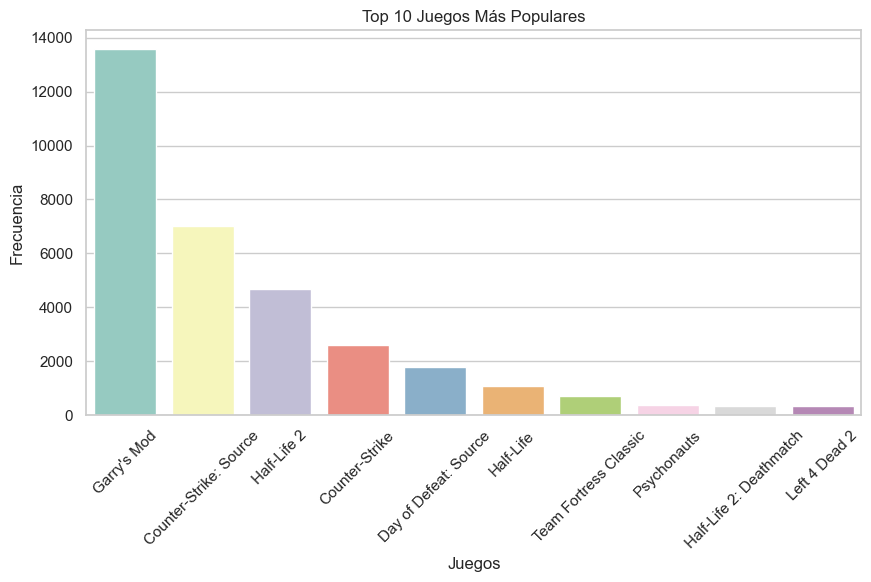

In [57]:
# Obtener los 10 juegos más jugados
top_titles = Df_General['app_name'].value_counts().nlargest(10)
# Seleccionar una paleta de colores "Set3"
colors = sns.color_palette("Set3")
# Crear el gráfico de barras con colores personalizados
plt.figure(figsize=(10, 5))
sns.barplot(x=top_titles.index, y=top_titles.values, palette=colors)
plt.xlabel('Juegos')
plt.ylabel('Frecuencia')
plt.title('Top 10 Juegos Más Populares')
plt.xticks(rotation=45)
plt.show()

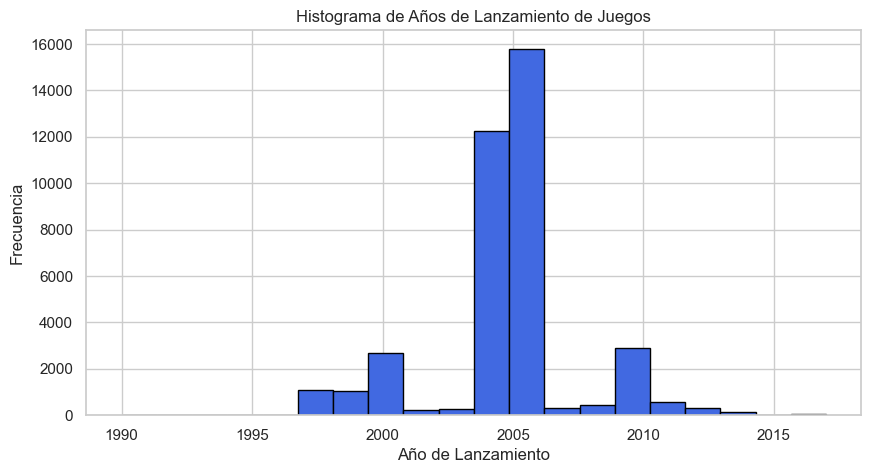

In [58]:
plt.figure(figsize=(10, 5))
# Crea el histograma de años de lanzamiento
plt.hist(Df_General['release_year'], bins=20, color='royalblue', edgecolor='black')
plt.title('Histograma de Años de Lanzamiento de Juegos')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Frecuencia')
plt.show()

In [59]:
# Calcula valores en la columna 'recommend' 
conteo = Df_General['recommend'].value_counts()
porcentaje = Df_General['recommend'].value_counts(normalize=True) * 100
# Crear un nuevo DataFrame con el conteo y porcentaje
recomendaciones = pd.DataFrame({
    'Conteo': conteo,
    'Porcentaje': porcentaje.round(2).astype(str) + '%'})
# Ordenar el DataFrame por el conteo de mayor a menor
recomendaciones = recomendaciones.sort_values(by='Conteo', ascending=False)

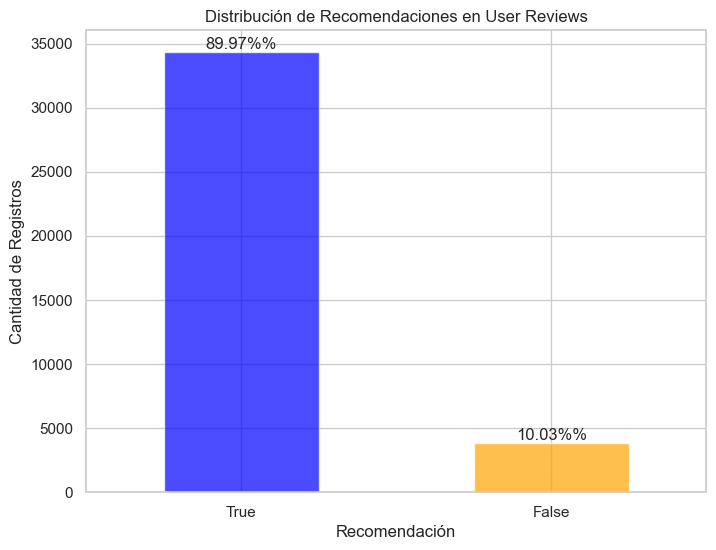

In [60]:
# Crear un gráfico de barras para visualizar las recomendaciones
plt.figure(figsize=(8, 6))
bars = recomendaciones['Conteo'].plot(kind='bar', color=['blue', 'orange'], alpha=0.7)
plt.title('Distribución de Recomendaciones en User Reviews')
plt.xlabel('Recomendación')
plt.ylabel('Cantidad de Registros')
# Agregar etiquetas con el porcentaje a cada barra
for bar, percentage in zip(bars.patches, recomendaciones['Porcentaje']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 5, f'{percentage}%', ha='center', va='bottom')
plt.xticks(rotation=0)
plt.show()

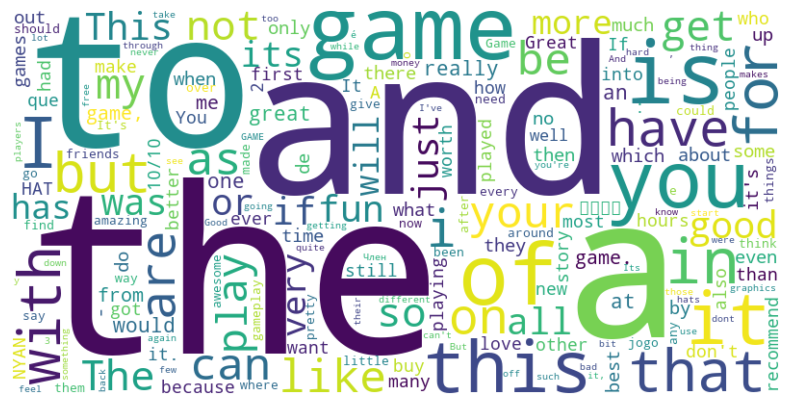

In [61]:
# Convertir todos los valores de la columna 'review' a texto (str)
reviews_text = ' '.join(str(review) for review in Df_General['review'])
# Contar frecuencias de palabras
word_frequencies = Counter(reviews_text.split())
# Crear la nube de palabras con colores personalizados
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_frequencies)
# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

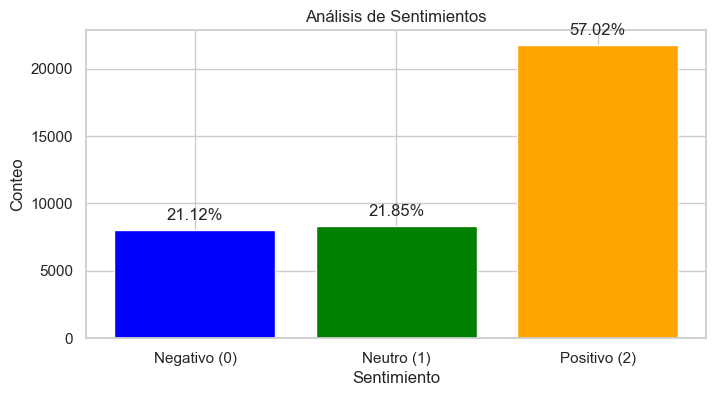

In [62]:
# Calcular el resumen de análisis de sentimientos

sentimiento = Df_General['sentiment'].value_counts()
porcentaje = (Df_General['sentiment'].value_counts(normalize=True) * 100).round(2)

# Crear un nuevo DataFrame con el resumen
resumen = pd.DataFrame({ 'Conteo': sentimiento,'Porcentaje': porcentaje.astype(str) + '%'})

# Ordenar el DataFrame por el conteo de mayor a menor
resumen = resumen.sort_index()

# Visualizar el resumen
fig, ax = plt.subplots(figsize=(8, 4))

# Crear barras para el conteo
ax.bar(resumen.index, resumen['Conteo'], color=['blue', 'green', 'orange'])

# Mostrar porcentajes encima de las barras
for i, v in enumerate(resumen['Porcentaje']):
    ax.text(i, resumen['Conteo'][i] + 500, f"{v}", ha='center', va='bottom')

# Configurar el gráfico
ax.set_title('Análisis de Sentimientos')
ax.set_xlabel('Sentimiento')
ax.set_ylabel('Conteo')
ax.set_xticks(resumen.index)
ax.set_xticklabels(['Negativo (0)', 'Neutro (1)', 'Positivo (2)'])
plt.show()

Modelo de Recomendación Usuario-Items

In [63]:
# Se crea el modelo de machine learning con Scikit-Learn
tfidf = TfidfVectorizer(stop_words='english')
Df_General=Df_General.fillna("")

tdfid_matrix = tfidf.fit_transform(Df_General['review'])
cosine_similarity = linear_kernel( tdfid_matrix, tdfid_matrix)

In [64]:
# Se crea la funcion de recomendación de 5 juegos recomendados para el usuario ingresado.
def recomendacion_usuario(id: int):
    if id not in Df_General['id'].values:
        return {'mensaje': 'No existe el id del usuario.'}

    titulo = Df_General.loc[Df_General['id'] == id, 'app_name'].iloc[0]
    sim_juegos = obtener_juegos_similares(titulo)
    
    return {'juegos recomendados': sim_juegos}

def obtener_juegos_similares(titulo: str, num_recomendaciones: int = 5):
    idx = Df_General[Df_General['app_name'] == titulo].index[0]
    sim_cosine = list(enumerate(cosine_similarity[idx]))
    sim_scores = sorted(sim_cosine, key=lambda x: x[1], reverse=True)
    sim_ind = [i for i, _ in sim_scores[1:num_recomendaciones + 1]]
    sim_juegos = Df_General['app_name'].iloc[sim_ind].values.tolist()
    
    return sim_juegos

print(recomendacion_usuario(220))

{'juegos recomendados': ['Half-Life 2', 'Day of Defeat: Source', 'Team Fortress Classic', 'Half-Life 2', 'Empire: Total War™']}
